[Sebastian Raschka](http://sebastianraschka.com), 2015

https://github.com/rasbt/python-machine-learning-book

# Python Machine Learning Essentials - Code Examples

# Bonus Material - A Simple Logistic Regression Implementation

Note that the optional watermark extension is a small IPython notebook plugin that I developed to make the code reproducible. You can just skip the following line(s).

In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -u -d -v -p numpy,pandas,matplotlib

Sebastian Raschka 
Last updated: 12/22/2015 

CPython 3.5.1
IPython 4.0.1

numpy 1.10.2
pandas 0.17.1
matplotlib 1.5.0


In [2]:
# to install watermark just uncomment the following line:
#%install_ext https://raw.githubusercontent.com/rasbt/watermark/master/watermark.py

## Overview

Please see Chapter 3 for more details on logistic regression.

![](./images/logistic_regression_schematic.png)

## Implementing logistic regression in Python

The following implementation is similar to the Adaline implementation in [Chapter 2](../ch02/ch02.ipynb) except that we replace the sum of squared errors cost function with the logistic cost function

$$J(\mathbf{w}) = \sum_{i=1}^{m} - y^{(i)} log \bigg( \phi\big(z^{(i)}\big) \bigg) - \big(1 - y^{(i)}\big) log\bigg(1-\phi\big(z^{(i)}\big)\bigg).$$

In [3]:
class LogisticRegression(object):
    """LogisticRegression classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    cost_ : list
        Cost in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []       
        for i in range(self.n_iter):
            y_val = self.activation(X)
            errors = (y - y_val)
            neg_grad = X.T.dot(errors)
            self.w_[1:] += self.eta * neg_grad
            self.w_[0] += self.eta * errors.sum()
            self.cost_.append(self._logit_cost(y, self.activation(X)))
        return self

    def _logit_cost(self, y, y_val):
        logit = -y.dot(np.log(y_val)) - ((1 - y).dot(np.log(1 - y_val)))
        return logit
    
    def _sigmoid(self, z):
        return 1.0 / (1.0 + np.exp(-z))
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """ Activate the logistic neuron"""
        z = self.net_input(X)
        return self._sigmoid(z)
    
    def predict_proba(self, X):
        """
        Predict class probabilities for X.
        
        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        
        Returns
        ----------
          Class 1 probability : float
        
        """
        return activation(X)

    def predict(self, X):
        """
        Predict class labels for X.
        
        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        
        Returns
        ----------
        class : int
            Predicted class label.
        
        """
        # equivalent to np.where(self.activation(X) >= 0.5, 1, 0)
        return np.where(self.net_input(X) >= 0.0, 1, 0)

### Reading-in the Iris data

In [4]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 1, 0)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# standardize features
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

### A function for plotting decision regions

In [6]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

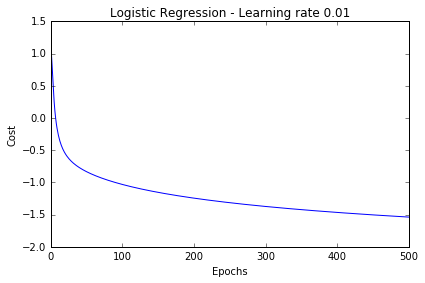

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

lr = LogisticRegression(n_iter=500, eta=0.2).fit(X_std, y)
plt.plot(range(1, len(lr.cost_) + 1), np.log10(lr.cost_))
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Logistic Regression - Learning rate 0.01')

plt.tight_layout()
plt.show()

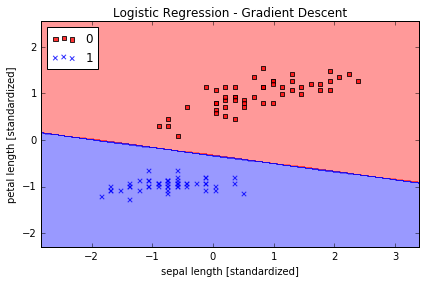

In [8]:
plot_decision_regions(X_std, y, classifier=lr)
plt.title('Logistic Regression - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()